In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
import matplotlib.pyplot as plt

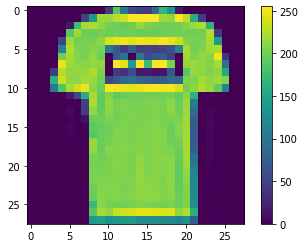

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()

In [10]:
# Max available in images
np.max(train_images)

255

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
# Reshaping the data to have single color channel
#train_images = train_images.reshape(train_images[0], 28, 28, 1)
#test_images = test_images.reshape(test_images[0], 28, 28, 1)

In [14]:
train_images = train_images/255.0
test_images = test_images/255.0

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [16]:
model = Sequential()

In [18]:
model.add(Flatten(input_shape = (28, 28)))

In [19]:
model.add(Dense(128, activation= "relu"))

In [20]:
model.add(Dense(10, activation= "softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer = "Adam", loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])

In [23]:
model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6419 - accuracy: 0.7775
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3866 - accuracy: 0.8617
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3439 - accuracy: 0.8742
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2923 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2704 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2594 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2429 - accuracy: 0.9105
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [27]:
pred_labels = model.predict_classes(test_images)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(test_labels, pred_labels)

0.8855